# 10M SMA SPY
Robert Sloan <br>
5/21/2019 <br>
replicating Al's AAII CIMI 10M SMA SPY Market timer <br>
SPY/10M Simple Moving Average (SMA) above 1.0% go long below 1.0% go short<br>
TO DO<br>
> calculate the 10M SMA from the end of last month <br>
> Can excel spreadsheet be formatted including column width? 


## load libraries

In [111]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#All matplotlib plots appear inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [112]:
from pandas_datareader import data

### Use datetime library for dates and times 

In [113]:
import datetime
currentDT = datetime.datetime.now()

todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-22


### get adjusted close SPY data

Date
2010-01-04    94.130867
2010-01-05    94.380074
2010-01-06    94.446495
2010-01-07    94.845207
2010-01-08    95.160805
Name: Adj Close, dtype: float64

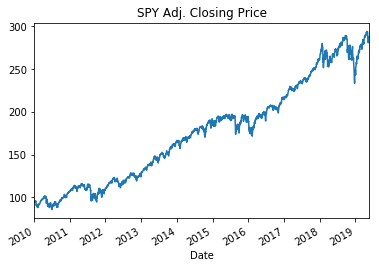

In [114]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


spy_data.plot(title='SPY Adj. Closing Price')# Convert the adjusted closing prices to cumulative returns.
spy_data.head()

### For missing data or starting on a non-market day

In [115]:
# Getting all weekdays between 01/01/2000 and end_date freq='B' chooses business days
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# reindex spy_data using all_weekdays as the new index.  Weekend data becomes NaN
spy_data = spy_data.reindex(all_weekdays)

# remove all 
# Reindexing will insert missing values (NaN) for the dates that were not present
# Fill the missing by replacing them
# with the last available price for each instrument.
spy_data = spy_data.fillna(method='ffill')

#print(all_weekdays)
print(spy_data.head(10))
spy_data.describe()

2010-01-04    94.130867
2010-01-05    94.380074
2010-01-06    94.446495
2010-01-07    94.845207
2010-01-08    95.160805
2010-01-11    95.293701
2010-01-12    94.404961
2010-01-13    95.202347
2010-01-14    95.459831
2010-01-15    94.388382
Freq: B, Name: Adj Close, dtype: float64


count    2448.000000
mean      175.733614
std        59.118344
min        85.641502
25%       118.500925
50%       178.685265
75%       217.315166
max       294.029999
Name: Adj Close, dtype: float64

### calculate and plot 10 month (210 day) simple moving average

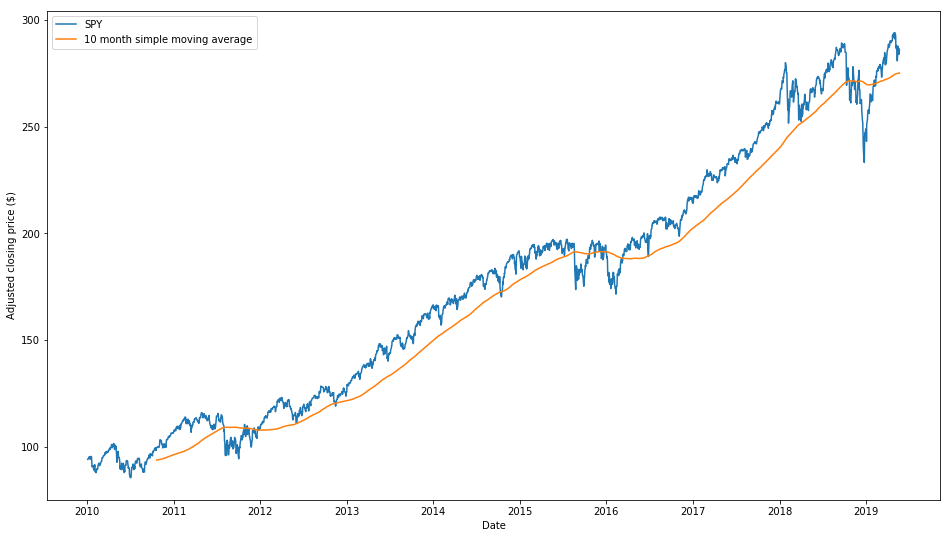

In [116]:
# Get the spy_data timeseries. This now returns a Pandas Series object indexed by date.

# Calculate the 10 month (210 days) moving averages of the closing prices
spy_10m_sma = spy_data.rolling(window=210).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(spy_10m_sma.index, spy_10m_sma, label='10 month simple moving average')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

### Determine to go 'Long' or 'Short' 

In [148]:
# Determine last market day of last month
now = time.localtime()
# Get the last day of last month by taking the first day of this month
# and subtracting 1 day.
lastDay = datetime.date(now.tm_year, now.tm_mon, 1) - datetime.timedelta(1)
# Set the day to 1 gives us the start of the month
firstDay = lastDay.replace(day=1)
lastDayOfLastMonth = spy_data.loc[firstDay:lastDay].last('1D').index # get the last market day last month
strLastDayOfLastMonth = spy_data.loc[firstDay:lastDay].last('1D').index[0].strftime('%Y-%m-%d') # get the last market day last month
print("Last Market Day last Month", strLastDayOfLastMonth)

# Determine last market day of the month before last
# Get the last day of last month by taking the first day of last month
# and subtracting 1 day.
lastDay = datetime.date(now.tm_year, now.tm_mon-1, 1) - datetime.timedelta(1)
# Set the day to 1 gives us the start of the month
firstDay = lastDay.replace(day=1)
lastDayOfMonthBeforeLast = spy_data.loc[firstDay:lastDay].last('1D').index # get the last market day last month
strLastDayOfMonthBeforeLast = spy_data.loc[firstDay:lastDay].last('1D').index[0].strftime('%Y-%m-%d') # get the last market day last month
print("Last Market Day Month before last", strLastDayOfMonthBeforeLast)

Last Market Day last Month 2019-04-30
Last Market Day Month before last 2019-03-29


str

In [160]:
# Last day of last month 10M SMA SPY
endOfLastMonth_spy = float(spy_data[lastDayOfLastMonth].values)
#print("endOfLastMonth_spy = " + str(spy_data[lastDayOfLastMonth]))
endOfLastMonth_spy_10m_sma = float(spy_10m_sma[lastDayOfLastMonth].values)
#print("endOfLastMonth_spy_10m_sma = " + str(spy_10m_sma[lastDayOfLastMonth]))
lastMonths_sma_spy = endOfLastMonth_spy/endOfLastMonth_spy_10m_sma
lastMonths_percent_sma_spy = round(((endOfLastMonth_spy/endOfLastMonth_spy_10m_sma)-1)*100,2)
if (lastMonths_sma_spy>1):
    statusLastMonth = 'LONG'
else:
    statusLastMonth = 'SHORT'
print("Last Months Indicator: " + statusLastMonth + " (" + str(lastMonths_percent_sma_spy) + "%)")

# Last day of last month 10M SMA SPY
endOfMonthBeforeLasts_spy = float(spy_data[lastDayOfMonthBeforeLast].values)
#print("endOfMonthBeforeLasts_spy = " + str(spy_data[lastDayOfMonthBeforeLast]))
endOfMonthBeforeLasts_spy_10m_sma = float(spy_10m_sma[lastDayOfMonthBeforeLast].values)
#print("endOfMonthBeforeLasts_spy_10m_sma = " + str(spy_10m_sma[lastDayOfMonthBeforeLast]))
MonthBeforeLasts_sma_spy = endOfMonthBeforeLasts_spy/endOfMonthBeforeLasts_spy_10m_sma
MonthBeforeLasts_percent_sma_spy = round(((endOfMonthBeforeLasts_spy/endOfMonthBeforeLasts_spy_10m_sma)-1)*100,2)
if (MonthBeforeLasts_sma_spy>1):
    statusMonthBeforeLast = 'LONG'
else:
    statusMonthBeforeLast = 'SHORT'
print("Month before lasts Indicator: " + statusMonthBeforeLast + " (" + str(MonthBeforeLasts_percent_sma_spy) + "%)")

Last Months Indicator: LONG (7.17%)
Month before lasts Indicator: LONG (3.73%)


### Create DataFrame with output

In [155]:
indicators = pd.DataFrame([{'Technical Indicator': '10 month SMA SPY',
                            strLastDayOfMonthBeforeLast:statusMonthBeforeLast + " (" + str(MonthBeforeLasts_percent_sma_spy) + "%)", 
                            strLastDayOfLastMonth:statusLastMonth + " (" + str(lastMonths_percent_sma_spy) + "%)", 
                            'Comment': " SPY/10 month SMA; 1.0 is lower limit"}], 
                           columns=['Technical Indicator', strLastDayOfLastMonth, strLastDayOfMonthBeforeLast,
                                    'Comment'])
indicators

,Technical Indicator,2019-04-30,2019-03-29,Comment
0,10 month SMA SPY,LONG (7.17%),LONG (3.73%),SPY/10 month SMA; 1.0 is lower limit


### Save as Excel file

In [156]:
writer = pd.ExcelWriter('indicator_sheet 10M SMA SPY.xlsx')
indicators.to_excel(writer,'Indicators', index=False)
writer.save()